In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
data = pd.read_csv("Data.csv")
# Set the "Date" column as the index
#data.set_index("Date", inplace=True)
data

,Date,Open,High,Low,Close
0,1/1/2013,54.993000,54.993000,54.667999,54.993000
1,1/2/2013,54.681000,54.681000,54.099998,54.678001
2,1/3/2013,54.348000,54.590000,54.150002,54.348000
3,1/4/2013,54.452999,55.178001,54.353001,54.498001
4,1/7/2013,55.064999,55.333000,54.880001,54.880001
...,...,...,...,...,...
2974,5/27/2024,83.052200,83.193398,83.037201,83.052200
2975,5/28/2024,83.145699,83.227303,83.087997,83.145699
2976,5/29/2024,83.206497,83.405899,83.146301,83.206497
2977,5/30/2024,83.365601,83.434998,83.216301,83.365601


In [3]:
# Verify that the index is a DatetimeIndex
print(data.index)

RangeIndex(start=0, stop=2979, step=1)


In [4]:
# Check for missing values
print(data.isnull().sum())

Date     0
Open     4
High     4
Low      4
Close    4
dtype: int64


In [5]:
data = data.dropna()

In [6]:
data

,Date,Open,High,Low,Close
0,1/1/2013,54.993000,54.993000,54.667999,54.993000
1,1/2/2013,54.681000,54.681000,54.099998,54.678001
2,1/3/2013,54.348000,54.590000,54.150002,54.348000
3,1/4/2013,54.452999,55.178001,54.353001,54.498001
4,1/7/2013,55.064999,55.333000,54.880001,54.880001
...,...,...,...,...,...
2974,5/27/2024,83.052200,83.193398,83.037201,83.052200
2975,5/28/2024,83.145699,83.227303,83.087997,83.145699
2976,5/29/2024,83.206497,83.405899,83.146301,83.206497
2977,5/30/2024,83.365601,83.434998,83.216301,83.365601


In [7]:
# Descriptive statistics
print(data.describe())

              Open         High          Low        Close
count  2975.000000  2975.000000  2975.000000  2975.000000
mean     69.967592    70.186863    69.751560    69.979655
std       7.629451     7.624441     7.639012     7.627339
min      53.132999    53.237999    52.882999    53.132999
25%      64.161751    64.309998    64.029999    64.177151
50%      68.970497    69.239998    68.809998    69.140198
75%      74.899902    75.104599    74.632554    74.891949
max      85.194000    84.929298    83.577400    85.194000


In [8]:
# Assuming the data is in 'MM/DD/YYYY' format
data["Date"] = pd.to_datetime(data["Date"], format='%m/%d/%Y')

# Extract month and year
data["Month"] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

print(data.head())

        Date       Open       High        Low      Close  Month  Year
0 2013-01-01  54.993000  54.993000  54.667999  54.993000      1  2013
1 2013-01-02  54.681000  54.681000  54.099998  54.678001      1  2013
2 2013-01-03  54.348000  54.590000  54.150002  54.348000      1  2013
3 2013-01-04  54.452999  55.178001  54.353001  54.498001      1  2013
4 2013-01-07  55.064999  55.333000  54.880001  54.880001      1  2013


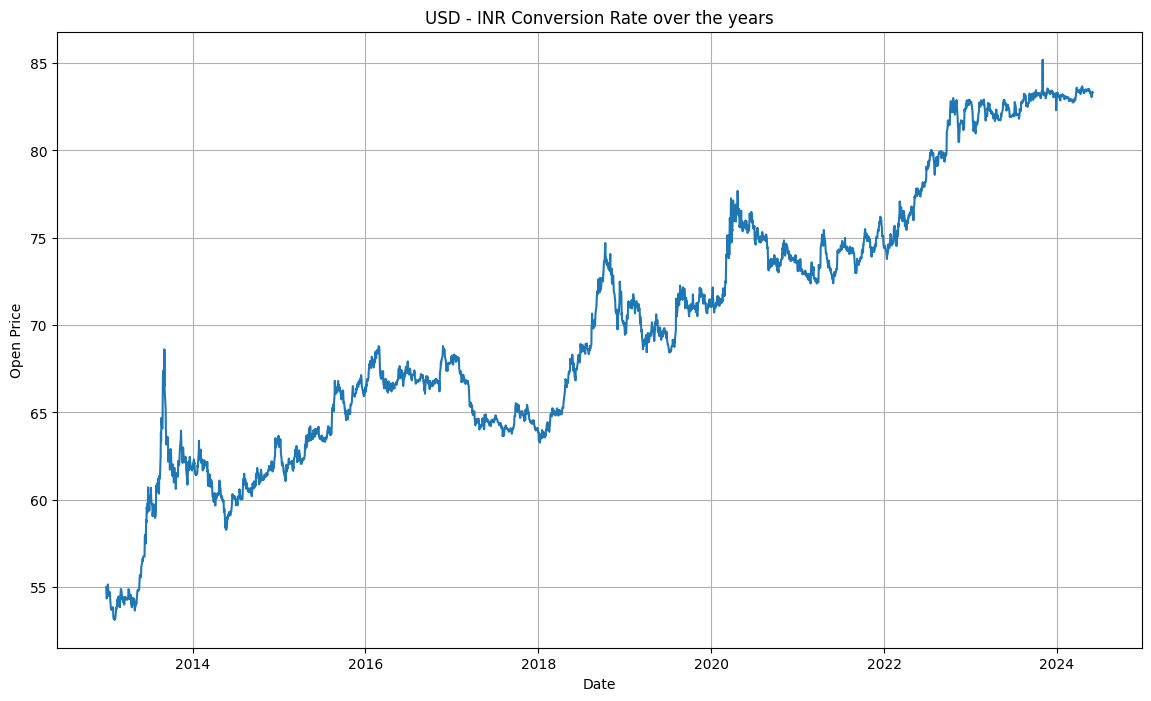

In [9]:
# Plot USD - INR Conversion Rate over the years
plt.figure(figsize=(14,8))
plt.plot(data["Date"], data["Open"], label='Open Price')
plt.title('USD - INR Conversion Rate over the years')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.show()

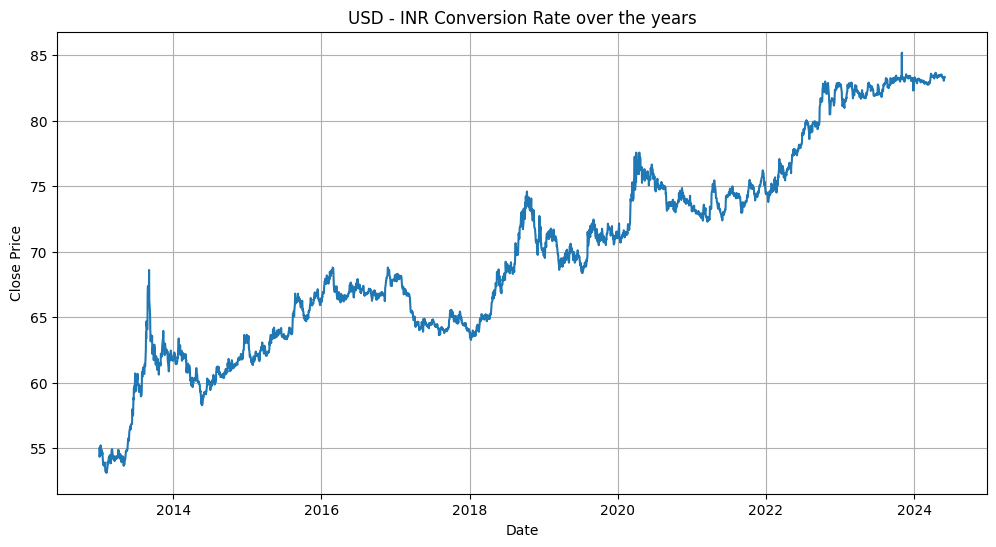

In [10]:
# Plot USD - INR Conversion Rate over the years
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Close"], label='Close Price')
plt.title('USD - INR Conversion Rate over the years')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

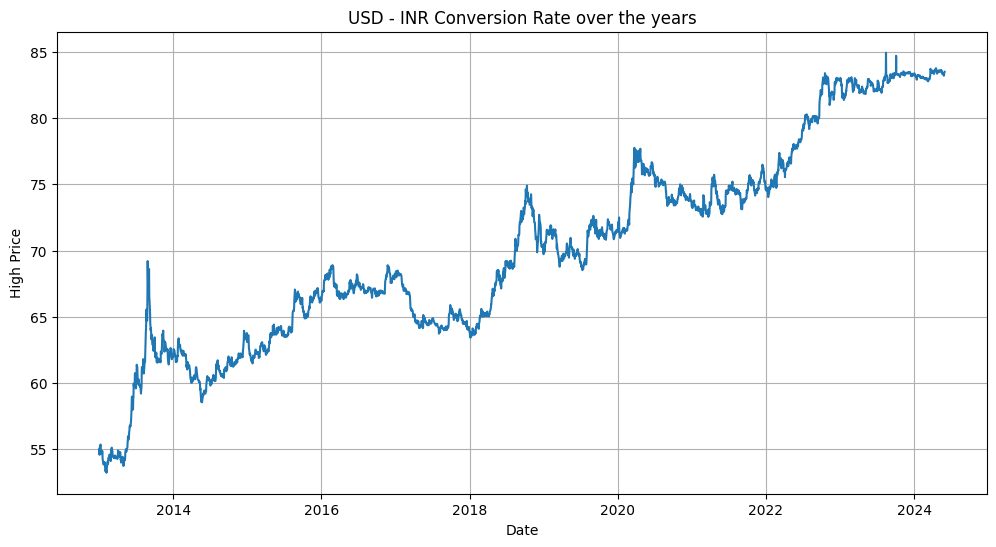

In [11]:
# Plot USD - INR Conversion Rate over the years
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["High"], label='High Price')
plt.title('USD - INR Conversion Rate over the years')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.grid(True)
plt.show()

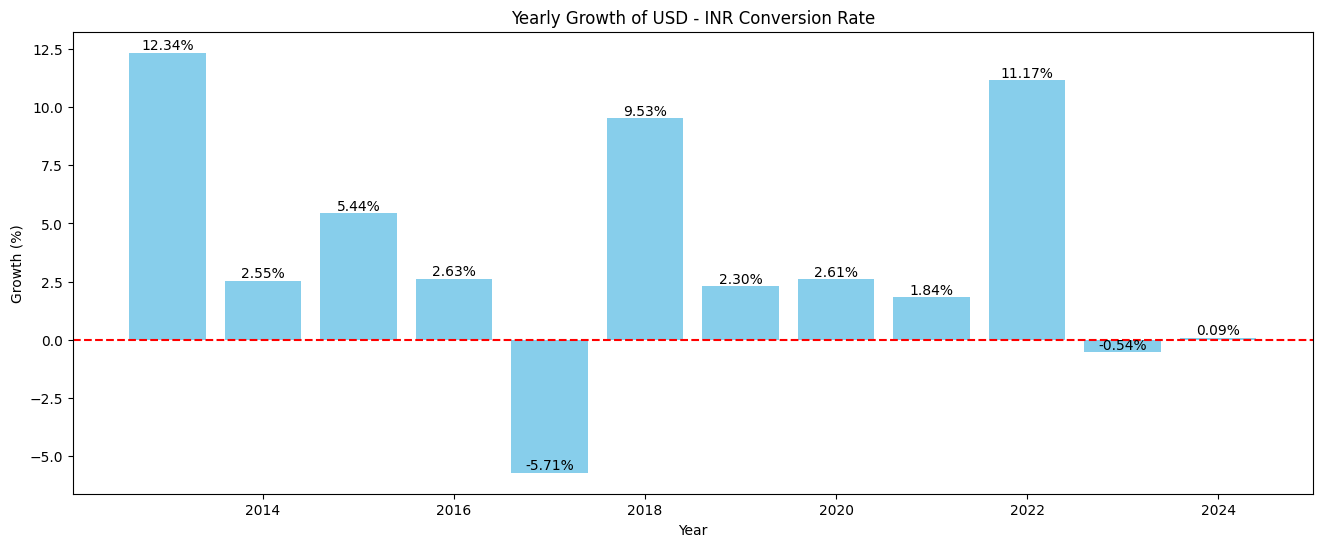

In [12]:
# Assuming data is already loaded and contains 'Date' and 'Close' columns
# Convert 'Date' to datetime and extract the year
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

# Calculate yearly growth
growth = data.groupby("Year").agg({"Close": lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100})

# Plot yearly growth
plt.figure(figsize=(16, 6))
bars = plt.bar(growth.index, growth['Close'], color='skyblue')

# Add a line at 0%
plt.axhline(0, color='red', linewidth=1.5, linestyle='--')

# Add percentage growth on top of each column
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.title("Yearly Growth of USD - INR Conversion Rate")
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.show()

In [13]:
# Calculate monthly growth
data['Growth'] = data.groupby(['Year', 'Month'])['Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])
data

,Date,Open,High,Low,Close,Month,Year,Growth
0,2013-01-01,54.993000,54.993000,54.667999,54.993000,1,2013,-0.030731
1,2013-01-02,54.681000,54.681000,54.099998,54.678001,1,2013,-0.030731
2,2013-01-03,54.348000,54.590000,54.150002,54.348000,1,2013,-0.030731
3,2013-01-04,54.452999,55.178001,54.353001,54.498001,1,2013,-0.030731
4,2013-01-07,55.064999,55.333000,54.880001,54.880001,1,2013,-0.030731
...,...,...,...,...,...,...,...,...
2974,2024-05-27,83.052200,83.193398,83.037201,83.052200,5,2024,-0.002126
2975,2024-05-28,83.145699,83.227303,83.087997,83.145699,5,2024,-0.002126
2976,2024-05-29,83.206497,83.405899,83.146301,83.206497,5,2024,-0.002126
2977,2024-05-30,83.365601,83.434998,83.216301,83.365601,5,2024,-0.002126


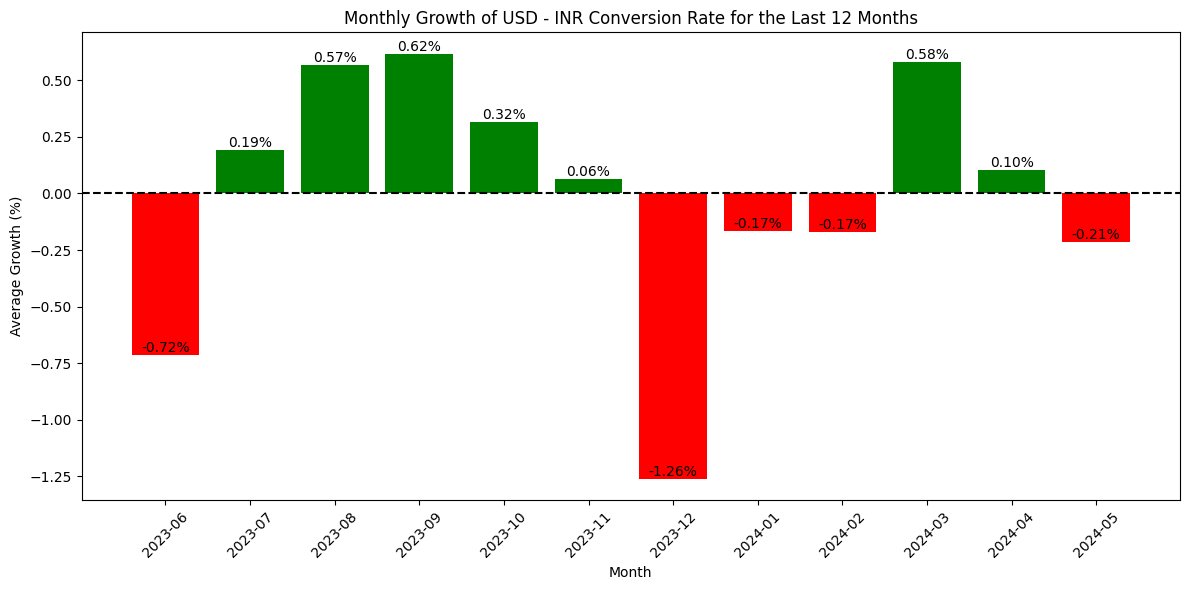

In [14]:
# Assuming data is already loaded and contains 'Date' and 'Close' columns
# Convert 'Date' to datetime and extract the month and year
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.to_period('M')

# Get the last 12 months of data
last_year = data['Date'].max() - pd.DateOffset(months=12)
last_year_data = data[data['Date'] > last_year]

# Calculate monthly growth for the last 12 months
monthly_growth_last_year = last_year_data.groupby("Month").agg({"Close": lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100})
monthly_growth_last_year.reset_index(inplace=True)
monthly_growth_last_year['Month'] = monthly_growth_last_year['Month'].astype(str)

# Define colors for the bars
colors = ['g' if growth >= 0 else 'r' for growth in monthly_growth_last_year['Close']]

# Plot aggregated monthly growth for the last 12 months
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_growth_last_year['Month'], monthly_growth_last_year['Close'], color=colors)

# Add a line at 0%
plt.axhline(0, color='black', linewidth=1.5, linestyle='--')

# Add percentage growth on top of each column
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.title("Monthly Growth of USD - INR Conversion Rate for the Last 12 Months")
plt.xlabel("Month")
plt.ylabel("Average Growth (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

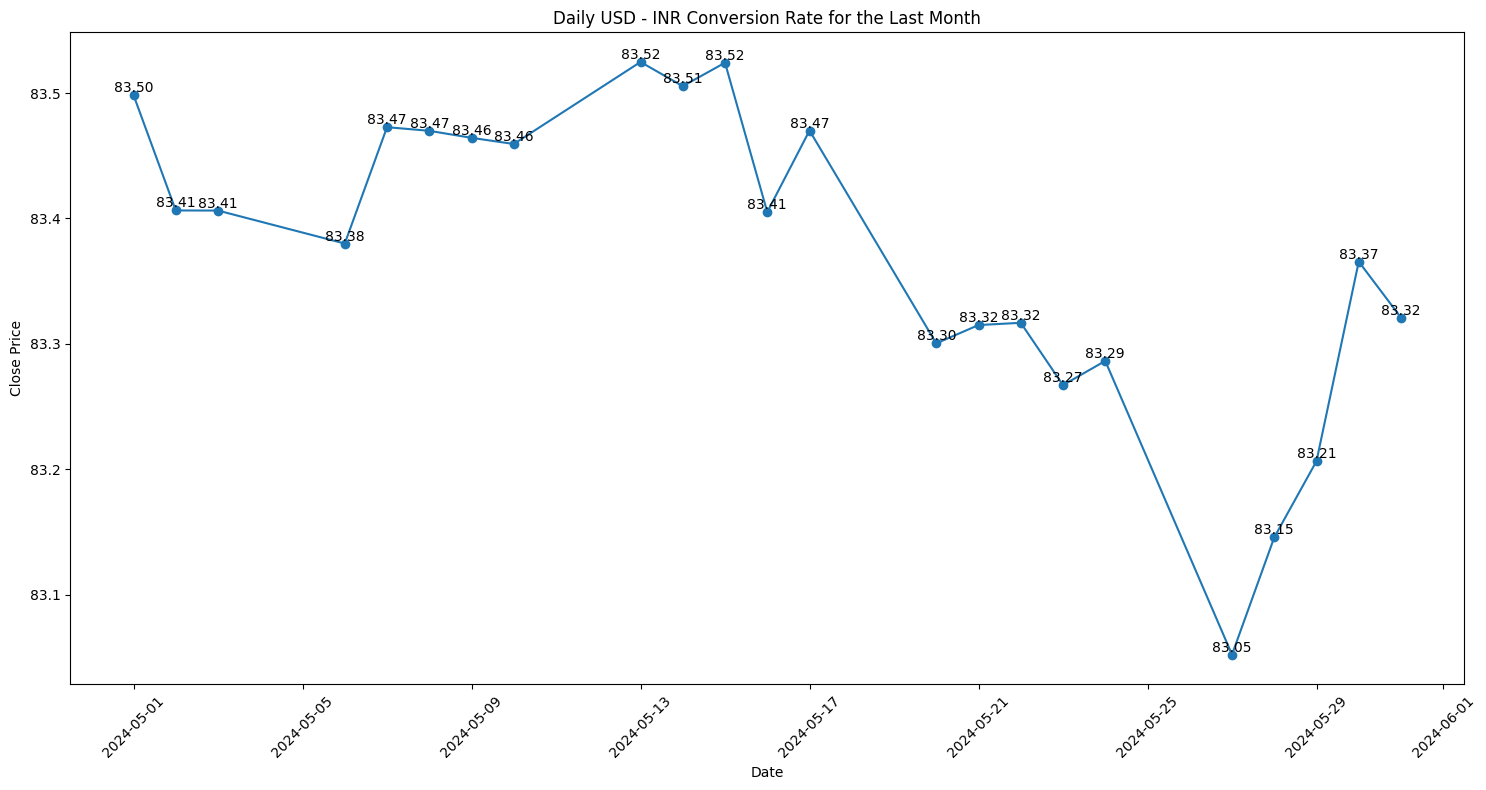

In [15]:
# Assuming data is already loaded and contains 'Date' and 'Close' columns
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Get the last month of data
last_month = data['Date'].max() - pd.DateOffset(months=1)
last_month_data = data[data['Date'] > last_month]

# Plot the daily closing prices for the last month
plt.figure(figsize=(15, 8))
plt.plot(last_month_data['Date'], last_month_data['Close'], marker='o', linestyle='-')

# Add values at each point in the graph
for i, row in last_month_data.iterrows():
    plt.text(row['Date'], row['Close'], f'{row["Close"]:.2f}', ha='center', va='bottom')

# Add labels and title
plt.title("Daily USD - INR Conversion Rate for the Last Month")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

In [17]:
# Ensure all feature columns are numerical
X = data.drop(columns=['Close'])
y = data['Close']

In [18]:
# Convert all features to numeric if they are not already
X = X.apply(pd.to_numeric, errors='coerce')

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
# Use SimpleImputer to handle missing data by filling with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [21]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [23]:
# Define and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.001583981294234342


In [27]:
# Print the predictions
predictions = model.predict(X_test)
print(predictions)

[74.67062357 74.57969186 74.64364996 74.78822806 75.41718679 75.13247321
 75.353623   75.81385198 75.68107505 75.96426026 76.51059632 77.09638269
 76.92291245 76.16326341 76.35665301 76.7357619  76.53942841 76.32081592
 76.03530574 76.00683784 75.98511468 76.32061437 76.14509355 76.56606437
 76.3472281  76.30798329 76.03820273 75.69906037 75.8461321  75.93735689
 75.95736367 75.4742107  75.51705535 75.96227877 75.9210416  75.93722254
 75.88348737 76.1559841  76.14610367 76.34202728 76.33383753 76.31355633
 76.45579553 76.27883674 76.3351325  76.49464545 76.55945931 76.80809104
 76.51052724 76.60151174 76.52517801 76.55872182 76.46420099 76.07244216
 76.60374361 77.02700017 77.36615332 77.29872549 77.45155325 77.4512478
 77.54246317 77.8091626  77.4161983  77.80930266 77.46944002 77.81708166
 77.54793515 77.51426437 77.52882164 77.6620293  77.70023562 77.55517591
 77.63516774 77.60501187 77.4071101  77.70930449 77.84087105 77.70032854
 77.75846808 77.86439939 78.19765423 78.17696251 78.

In [28]:
from sklearn.metrics import r2_score

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

R^2 Score: 0.9997039532675953


In [29]:
# Create a DataFrame for predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)

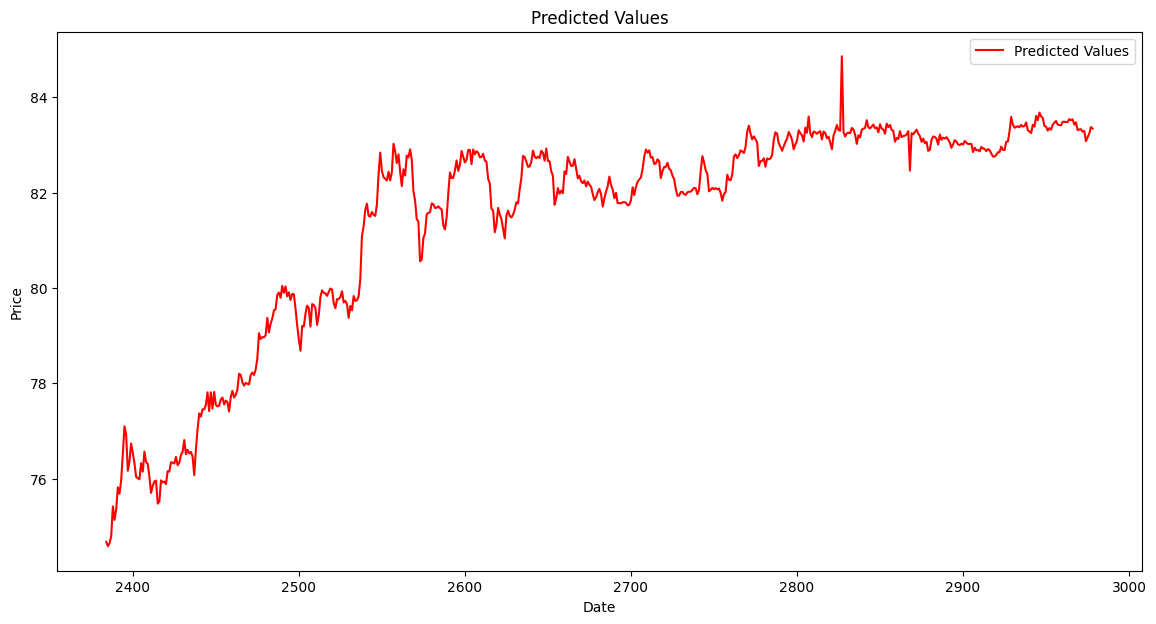

In [30]:
# Plot the predicted values
plt.figure(figsize=(14, 7))
plt.plot(predictions['Predicted'], label='Predicted Values', color='red')
plt.title('Predicted Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

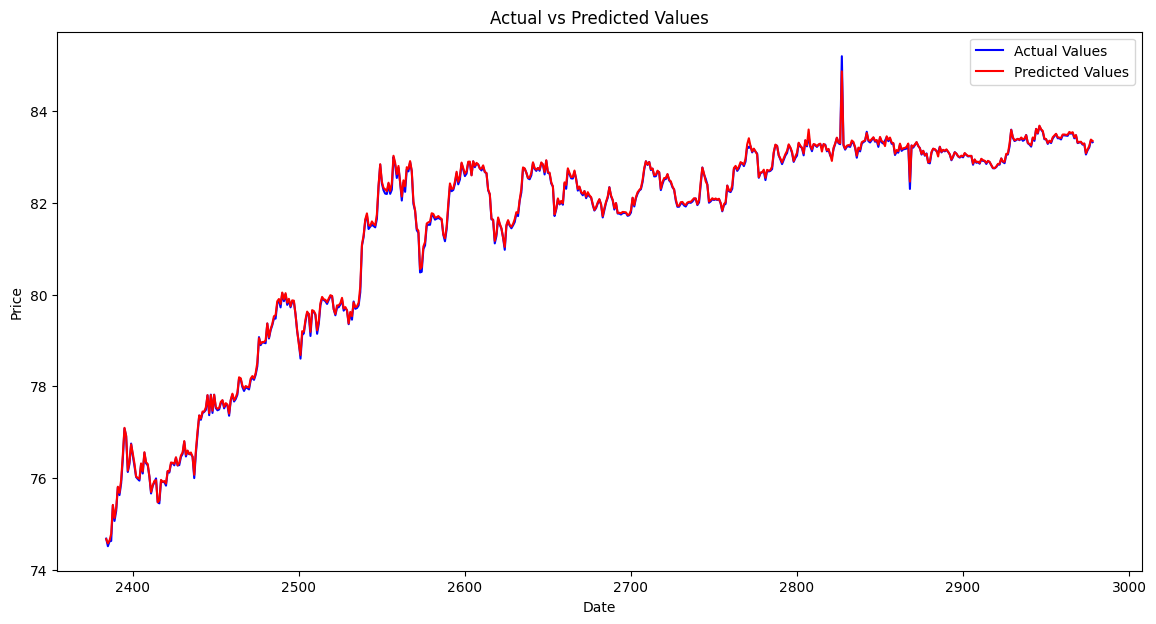

In [31]:
# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(predictions['Actual'], label='Actual Values', color='blue')
plt.plot(predictions['Predicted'], label='Predicted Values', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()